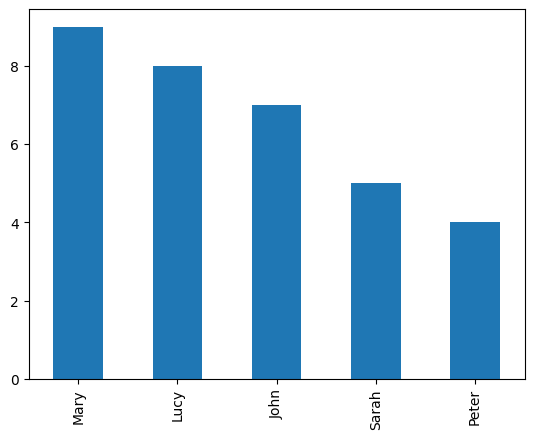

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#les notes de dawbio amb series
student_list=["John","Mary","Lucy","Peter", "Sarah"]
grades_list = [7,9,8,4,5]
wants_fct_list = [False,True,False,True, True]
dades: dict[list] = {"grade": grades_list,
                   "fct": wants_fct_list}
students_frame = pd.DataFrame(
    index=student_list,
    data = dades
)
students_frame = students_frame.sort_values(by=['grade'], ascending=False)


#Seleccionem la info que volem i generem el gràfic.
students_frame.loc[:,"grade"].plot(kind="bar")
plt.savefig('save_as_a_png.png')


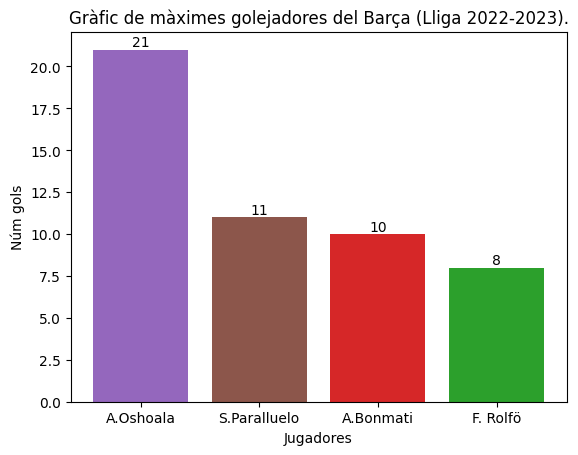

In [2]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()


# Dades del gràfic
titol = "Gràfic de màximes golejadores del Barça (Lliga 2022-2023)."
etiq_y = "Núm gols"
etiq_x = "Jugadores"
llegenda_x = ["A.Oshoala", "S.Paralluelo", "A.Bonmati", "F. Rolfö"]
valors_y = [21, 11, 10, 8]
colors_y = ['tab:purple', 'tab:brown', 'tab:red', 'tab:green']


# Creem el gràfic.
bar_container = ax.bar(llegenda_x, valors_y, label=llegenda_x, color=colors_y)
ax.bar_label(bar_container, fmt='%.0f')
ax.set_ylabel(etiq_y)
ax.set_xlabel(etiq_x)
ax.set_title(titol)
#ax.legend(title='Fruit color')


plt.show()


   Partit  NumVots PercVots  Regidors
0     PSC    43696   43.35%        14
1     ERC    16342   16.21%         5
2      Cs    11899   11.80%         4
3     ECP    11280   11.19%         3
4      PP     5199    5.16%         1
5  Altres    12786   12.63%         0


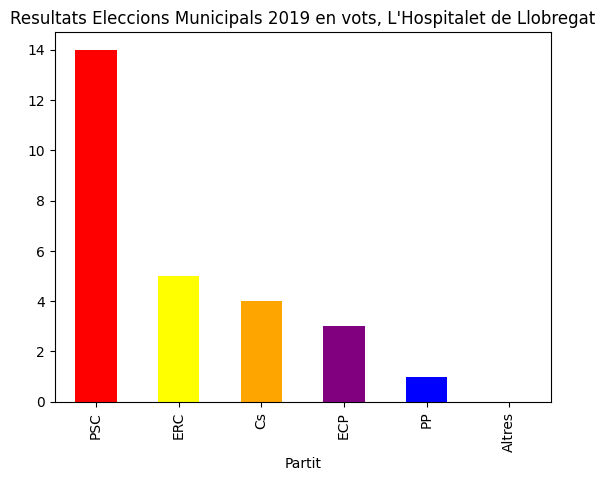

In [4]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt


# Obtingudes de: https://www.naciodigital.cat/municipals2019/municipi/08101/hospitalet-llobregat
csv_file_path: str = "vots-lh-2019.csv"
df_eleccions: pd.DataFrame = pd.read_csv(csv_file_path, sep=";")


print(df_eleccions)


# Afegim una nova columna amb els colors dels partits.
# https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/
colorsPartits=["Red","Yellow","Orange","Purple","Blue","Pink"]
df_eleccions.loc[:,'Color'] = colorsPartits


pl_title = "Resultats Eleccions Municipals 2019 en vots, L'Hospitalet de Llobregat"
# Most pandas plots use the label and color arguments(note the lack of “s” on those). To be consistent with pyplot.pie() you must use labels and colors.


# Pintem el diagrama de sectors i el guardem.
df_eleccions.loc[:,'NumVots'].plot.pie(
    title=pl_title,
    colors=df_eleccions.loc[:,'Color'],
    autopct="%1.1f%%",
    fontsize=12,
    labels=df_eleccions.loc[:,'Partit']
)
plt.savefig('pieplot-pd-2.png')


# Esborrem el contenidor per a fer l'altre gràfic.
plt.clf()


# Per defecte a l'eix de les x posa l'index del dataframe.
# Farem un nou dataframe en el que l'index sigui el nom del partit en comptes
# d'un número autogenerat així quedarà bé.
df_eleccions2 = copy.deepcopy(df_eleccions)


# inplace=True per a què actualitzi inmediatament.
df_eleccions2.set_index('Partit', inplace=True)
df_eleccions2.loc[:,'Regidors'].plot.bar(
    title=pl_title,
    y=df_eleccions.loc[:,'Regidors'],
    color=df_eleccions.loc[:,'Color'],
)


# Pintem el diagrama de barres i el guardem.
plt.savefig('barplot-pd-2.png')

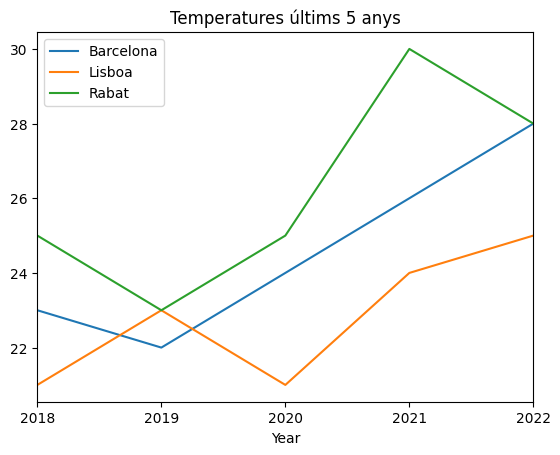

In [5]:
# Creem el data_range dels últims 5 anys (anual).
range_20_last_years = pd.date_range("1/1/2018", periods=5, freq='A')


df = pd.DataFrame(
    index=range_20_last_years,
    data= {
            "Barcelona":[23,22,24,26,28],
            "Lisboa":[21,23,21,24,25],
            "Rabat":[25,23,25,30,28],
        }
    )
df.index.name="Year"
# display(df)
df.plot(title="Temperatures últims 5 anys",legend=True)


# Per a què es mostri el gràfic amb Python cal guardar-lo en fitxer.
plt.savefig('intro-lineplot1.png')



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Da

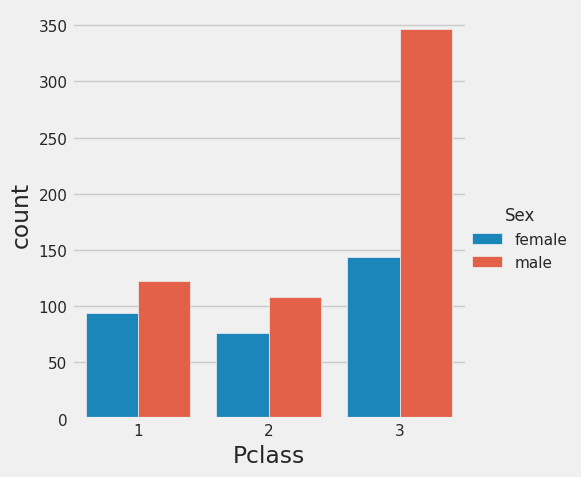

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv
titanic_df = pd.read_csv('titanic.csv')
print(titanic_df.head())


# Exploring the data using pandas methods : 'shape', 'info', 'describe', 'dtype', 'mean()', ...
print(f"DataFrame shape : {titanic_df.shape}\n===========")
print(f"DataFrame info : {titanic_df.info()}\n============")
print(f"DataFrame columns : {titanic_df.columns}\n==========")
print(f"The type of each column : {titanic_df.dtypes}\n=============")
print(f"How much missing value in every column : {titanic_df.isna().sum()}\n=====")
# Estilo.
sns.set(style="ticks")
plt.style.use("fivethirtyeight")
# Let's first check gender
# 'catplot()': Figure-level interface for drawing categorical plots onto a FacetGrid.
# sns.catplot(x='Sex', data=titanic_df, kind='count')


# Now let separate the gender by classes passing 'Sex' to the 'hue' parameter
sns.catplot(x='Pclass', data=titanic_df, hue='Sex', kind='count')


# Function to save plot in HD
plt.savefig('save_as_a_png.png')


Person categories : ['male' 'female' 'Child']
Distribution of person : Person
male      537
female    271
Child      83
Name: count, dtype: int64
Mean age : 29.69911764705882


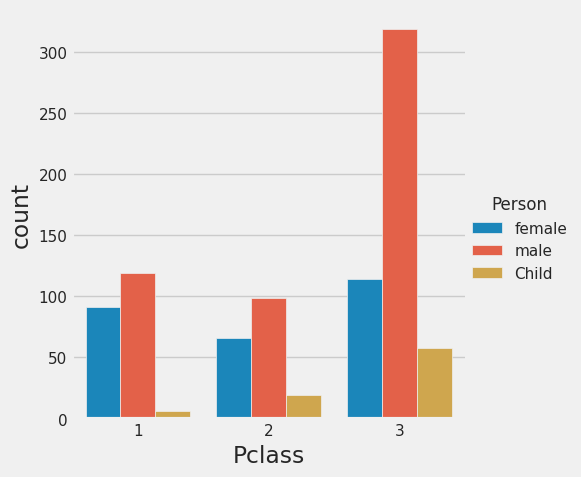

In [7]:
# Create a new column 'Person' in which every person under 16 is child.
titanic_df['Person'] = titanic_df.Sex
titanic_df.loc[titanic_df['Age'] < 16, 'Person'] = 'Child'
# Checking the distribution
print(f"Person categories : {titanic_df.Person.unique()}\n========")
print(f"Distribution of person : {titanic_df.Person.value_counts()}\n=============")
print(f"Mean age : {titanic_df.Age.mean()}\n==============")


sns.catplot(x='Pclass', data=titanic_df, hue='Person', kind='count')
